# PCA in Sci-Kit Learn

* Predict Points from acoustic features
* Taken orginally from [Julia Silge's](https://juliasilge.com/blog/best-hip-hop/) post
* Article [here](http://www.bbc.com/culture/story/20191007-the-greatest-hip-hop-songs-of-all-time-who-voted)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hiphop.csv")

In [3]:
df

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Juicy,The Notorious B.I.G.,140,1994,0.889,0.816,9,-4.670,1,0.2470,0.472000,0.000000,0.2040,0.7770,96.056
1,Fight The Power,Public Enemy,100,1989,0.797,0.582,2,-12.970,1,0.2550,0.004840,0.000002,0.5170,0.4150,105.974
2,Shook Ones (Part II),Mobb Deep,94,1995,0.637,0.878,6,-5.506,1,0.3690,0.076200,0.000000,0.1180,0.6520,94.921
3,The Message,Grandmaster Flash & The Furious Five,90,1982,0.947,0.607,10,-10.580,0,0.2020,0.024900,0.000005,0.0861,0.7320,100.619
4,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,84,1992,0.766,0.559,11,-7.030,0,0.0469,0.416000,0.906000,0.1660,0.6110,94.662
5,C.R.E.A.M.,Wu-Tang Clan,62,1993,0.479,0.549,11,-10.551,0,0.3730,0.570000,0.023900,0.1270,0.5760,180.985
6,93 ’Til Infinity,Souls of Mischief,50,1993,0.590,0.672,1,-11.792,1,0.4120,0.125000,0.000001,0.1470,0.6880,206.247
7,Passin’ Me By,The Pharcyde,48,1992,0.759,0.756,4,-8.145,0,0.2660,0.090300,0.000002,0.2650,0.6130,87.059
8,N.Y. State Of Mind,Nas,46,1994,0.665,0.910,6,-4.682,0,0.2230,0.039400,0.000000,0.2270,0.8870,84.099
9,Dear Mama,2Pac,42,1995,0.773,0.540,6,-7.123,1,0.1030,0.371000,0.000000,0.1310,0.3220,84.115


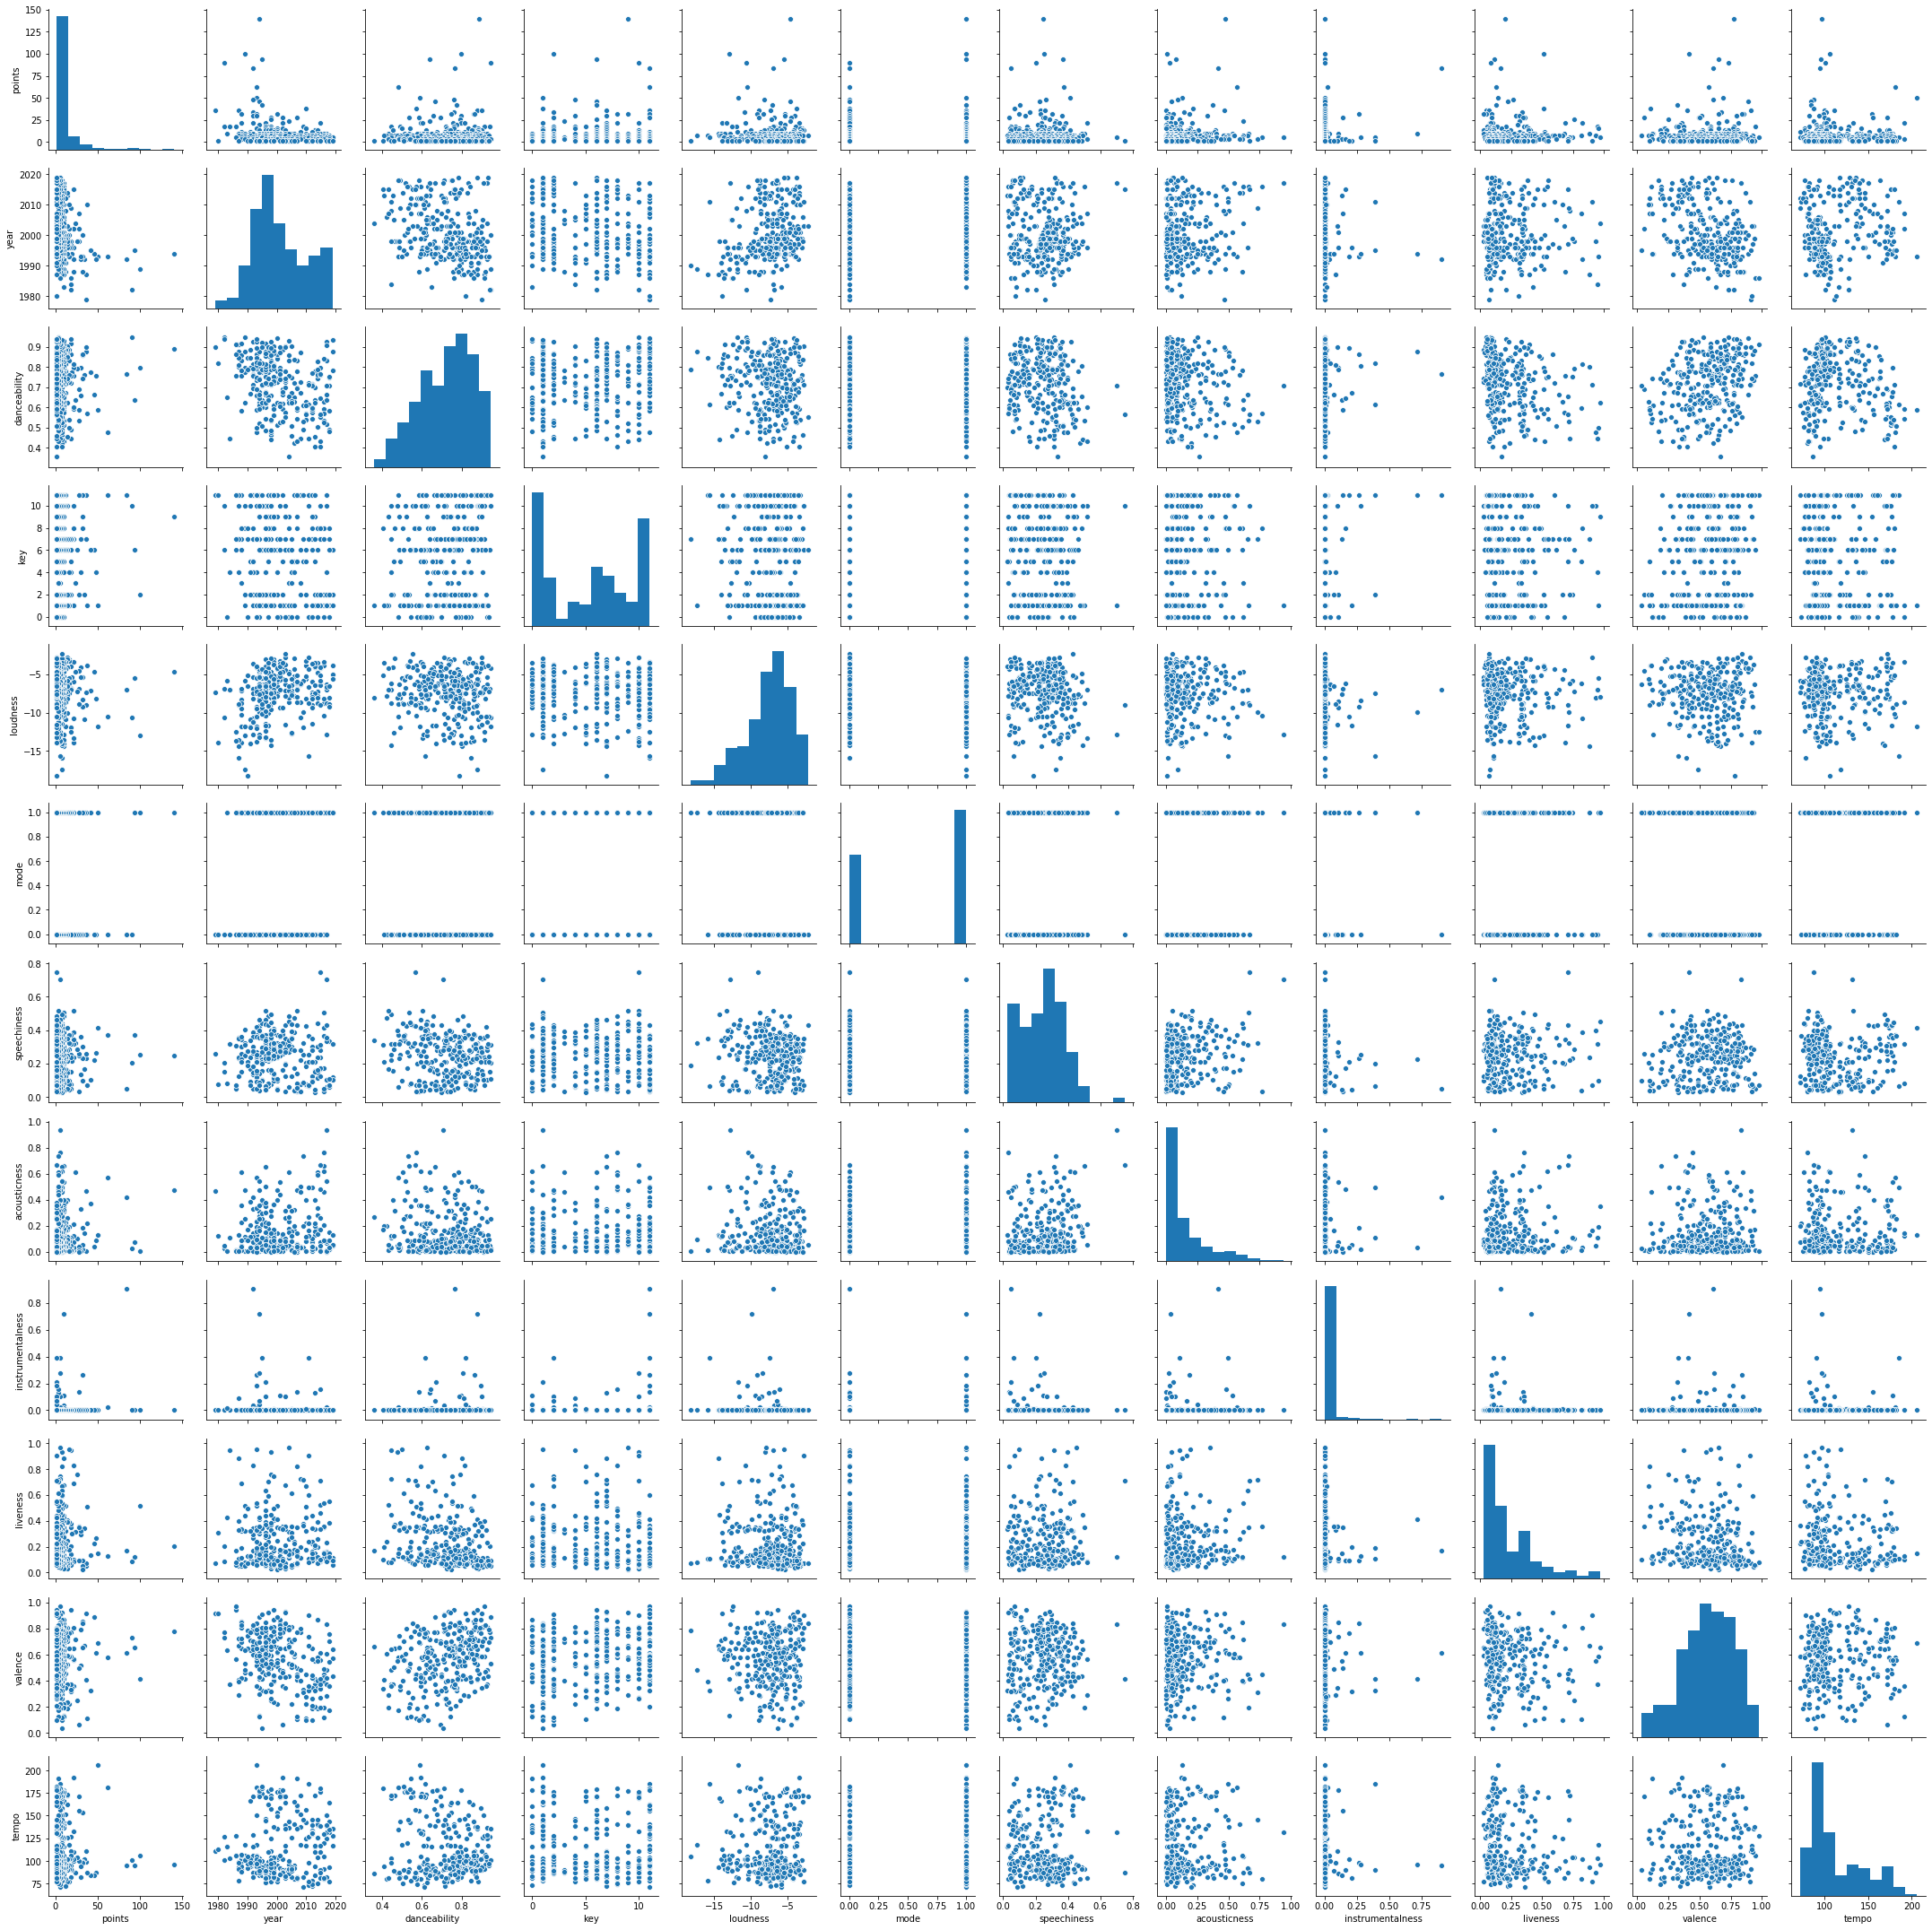

In [6]:
sns.pairplot(df[['points','year','danceability','key','loudness','mode','speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']])

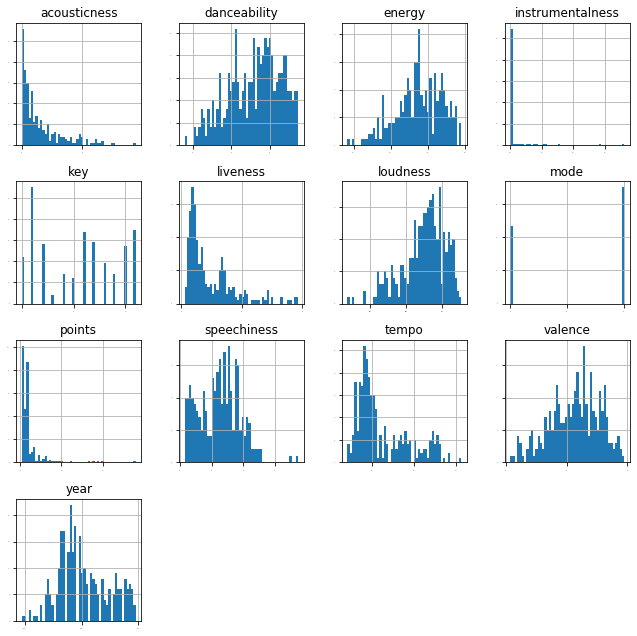

In [7]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

Note here that data appears to be skewed and on different scales! Gotta put everything on the same scale!

In [67]:
# Just get numeric data 

df_continuous = df[['year','danceability','key','loudness','mode','speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']]

df_continuous.corr()

,year,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,1.000000,-0.349034,-0.131942,0.311274,0.096653,-0.067436,0.165319,-0.067740,-0.007936,-0.373821,0.168324
danceability,-0.349034,1.000000,0.117719,-0.102826,0.021533,-0.190232,-0.169659,0.073675,-0.278734,0.319196,-0.189738
key,-0.131942,0.117719,1.000000,-0.102648,-0.237964,-0.010212,0.045765,0.148281,0.004984,0.162565,-0.029304
loudness,0.311274,-0.102826,-0.102648,1.000000,0.051339,-0.140592,-0.055691,-0.101087,-0.010925,-0.016929,0.040207
mode,0.096653,0.021533,-0.237964,0.051339,1.000000,-0.060217,0.087619,-0.011103,-0.042392,-0.037083,0.058746
speechiness,-0.067436,-0.190232,-0.010212,-0.140592,-0.060217,1.000000,0.224256,-0.145380,0.051511,0.066434,-0.006639
acousticness,0.165319,-0.169659,0.045765,-0.055691,0.087619,0.224256,1.000000,0.058028,0.077090,0.012492,0.036299
instrumentalness,-0.067740,0.073675,0.148281,-0.101087,-0.011103,-0.145380,0.058028,1.000000,-0.026641,-0.032780,-0.031372
liveness,-0.007936,-0.278734,0.004984,-0.010925,-0.042392,0.051511,0.077090,-0.026641,1.000000,-0.144499,-0.066194
valence,-0.373821,0.319196,0.162565,-0.016929,-0.037083,0.066434,0.012492,-0.032780,-0.144499,1.000000,-0.027178


In [14]:

# Standard Scalar!

df_z = StandardScaler().fit_transform(df_continuous)

print("mean: ", np.round(df_z.mean(), 2))
print("standard dev: ", np.round(df_z.std(), 2))

mean:  0.0
standard dev:  1.0


In [15]:
df_z

array([[-0.73283345,  1.25044189,  0.95973441, ..., -0.14811524,
         1.04105653, -0.53832895],
       [-1.29258371,  0.56577346, -0.90077152, ...,  1.44057968,
        -0.75517602, -0.21699851],
       [-0.62088339, -0.62495425,  0.16237473, ..., -0.58462566,
         0.42081048, -0.57510149],
       ...,
       [-0.73283345, -0.94496232,  0.16237473, ..., -0.47803591,
        -0.70059437,  1.91422127],
       [-0.17308319,  0.63275189,  1.49130753, ...,  0.33407651,
        -0.62616485, -0.83234728],
       [ 0.61056718,  0.85601334, -1.16655808, ..., -0.03137408,
         0.74830039,  1.69831624]])

## Running PCA

In [30]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(df_z)
pca

array([[ 1.13827112,  0.19623231, -0.89090798, ..., -0.17314735,
        -0.58165398,  0.75037096],
       [ 0.63558038,  0.46917205, -0.20805547, ..., -0.01741653,
        -0.51638734, -0.11218471],
       [ 0.16776363,  0.03969337, -0.9281895 , ...,  1.34660211,
         0.56288185,  0.54254786],
       ...,
       [-0.81516683,  1.89653079, -0.53379889, ..., -0.24519809,
        -0.76475834,  1.28799626],
       [ 0.80072486,  0.08549339,  1.44827951, ...,  0.63144082,
        -0.6911633 ,  0.21086533],
       [-0.64366472, -1.75507051, -1.30179399, ...,  0.23289523,
        -1.0910827 , -0.70465644]])

Text(0, 0.5, 'Variance Explained')

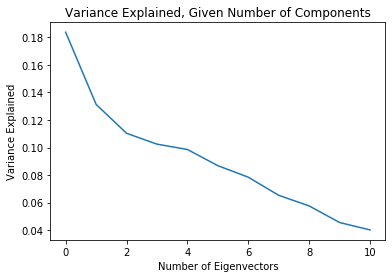

In [31]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [32]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:5].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:23].sum()*100," % of our data!")

[0.18376453 0.1313142  0.1103399  0.1024414  0.09855906 0.08679375
 0.07840215 0.06525874 0.05753192 0.04548385 0.04011049]
--------------------
0.6264190878671452
--------------------
If we use ALL the data we can explain 99.99999999999999  % of our data!


In [33]:
# Get all PCs

In [34]:
pca = pd.DataFrame(pca[:, :10], index=df.index)
pca

,0,1,2,3,4,5,6,7,8,9
0,1.138271,0.196232,-0.890908,1.112319,-0.141811,-2.117130,0.613645,-0.617406,-0.173147,-0.581654
1,0.635580,0.469172,-0.208055,-1.195226,2.273670,1.422700,0.694658,-0.471644,-0.017417,-0.516387
2,0.167764,0.039693,-0.928190,-0.260520,-0.061315,-0.472773,-0.091654,0.526167,1.346602,0.562882
3,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
4,2.775638,0.467732,6.812645,6.167019,2.623782,-1.314122,0.118562,5.559966,0.130937,-0.042839
5,-0.456689,3.005039,-0.017654,2.103279,-1.688384,1.200117,0.197668,-0.159613,-0.649004,0.456907
6,-0.511677,0.809973,-2.068135,1.081424,-0.158842,3.008418,1.061904,0.783807,0.073883,0.170528
7,1.047849,0.435760,0.150023,-1.202809,-0.002846,-0.022211,-0.415641,0.528014,-0.599054,-0.005661
8,1.130300,-0.021177,0.132115,-1.169835,-1.152507,-0.935489,0.286250,1.006947,-0.203582,0.999282
9,0.003066,-0.526541,0.208673,0.498578,1.158723,-0.879712,-0.490864,-1.124782,-0.449760,-0.080740


In [42]:
pca.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7',7:'PC8',8:'PC9',9:'PC10'}, inplace=True)
pca

,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
0,1.138271,0.196232,-0.890908,1.112319,-0.141811,-2.117130,0.613645,-0.617406,-0.173147,-0.581654
1,0.635580,0.469172,-0.208055,-1.195226,2.273670,1.422700,0.694658,-0.471644,-0.017417,-0.516387
2,0.167764,0.039693,-0.928190,-0.260520,-0.061315,-0.472773,-0.091654,0.526167,1.346602,0.562882
3,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
4,2.775638,0.467732,6.812645,6.167019,2.623782,-1.314122,0.118562,5.559966,0.130937,-0.042839
5,-0.456689,3.005039,-0.017654,2.103279,-1.688384,1.200117,0.197668,-0.159613,-0.649004,0.456907
6,-0.511677,0.809973,-2.068135,1.081424,-0.158842,3.008418,1.061904,0.783807,0.073883,0.170528
7,1.047849,0.435760,0.150023,-1.202809,-0.002846,-0.022211,-0.415641,0.528014,-0.599054,-0.005661
8,1.130300,-0.021177,0.132115,-1.169835,-1.152507,-0.935489,0.286250,1.006947,-0.203582,0.999282
9,0.003066,-0.526541,0.208673,0.498578,1.158723,-0.879712,-0.490864,-1.124782,-0.449760,-0.080740


In [45]:
pca = df.join(pca)
pca

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
0,Juicy,The Notorious B.I.G.,140,1994,0.889,0.816,9,-4.670,1,0.2470,...,1.138271,0.196232,-0.890908,1.112319,-0.141811,-2.117130,0.613645,-0.617406,-0.173147,-0.581654
1,Fight The Power,Public Enemy,100,1989,0.797,0.582,2,-12.970,1,0.2550,...,0.635580,0.469172,-0.208055,-1.195226,2.273670,1.422700,0.694658,-0.471644,-0.017417,-0.516387
2,Shook Ones (Part II),Mobb Deep,94,1995,0.637,0.878,6,-5.506,1,0.3690,...,0.167764,0.039693,-0.928190,-0.260520,-0.061315,-0.472773,-0.091654,0.526167,1.346602,0.562882
3,The Message,Grandmaster Flash & The Furious Five,90,1982,0.947,0.607,10,-10.580,0,0.2020,...,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
4,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,84,1992,0.766,0.559,11,-7.030,0,0.0469,...,2.775638,0.467732,6.812645,6.167019,2.623782,-1.314122,0.118562,5.559966,0.130937,-0.042839
5,C.R.E.A.M.,Wu-Tang Clan,62,1993,0.479,0.549,11,-10.551,0,0.3730,...,-0.456689,3.005039,-0.017654,2.103279,-1.688384,1.200117,0.197668,-0.159613,-0.649004,0.456907
6,93 ’Til Infinity,Souls of Mischief,50,1993,0.590,0.672,1,-11.792,1,0.4120,...,-0.511677,0.809973,-2.068135,1.081424,-0.158842,3.008418,1.061904,0.783807,0.073883,0.170528
7,Passin’ Me By,The Pharcyde,48,1992,0.759,0.756,4,-8.145,0,0.2660,...,1.047849,0.435760,0.150023,-1.202809,-0.002846,-0.022211,-0.415641,0.528014,-0.599054,-0.005661
8,N.Y. State Of Mind,Nas,46,1994,0.665,0.910,6,-4.682,0,0.2230,...,1.130300,-0.021177,0.132115,-1.169835,-1.152507,-0.935489,0.286250,1.006947,-0.203582,0.999282
9,Dear Mama,2Pac,42,1995,0.773,0.540,6,-7.123,1,0.1030,...,0.003066,-0.526541,0.208673,0.498578,1.158723,-0.879712,-0.490864,-1.124782,-0.449760,-0.080740


What have we done here?

* Tranformed raw data to series of linear combinations that explain the data
* Have raw data and PC scores 

# Interpretation of Components

Let's just get first three!

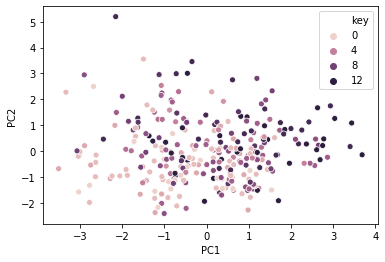

In [46]:
sns.scatterplot("PC1", "PC2", hue = "key", data = pca)

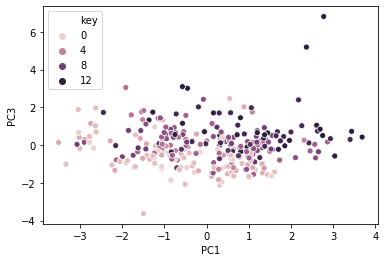

In [47]:
sns.scatterplot("PC1", "PC3", hue = "key", data = pca)

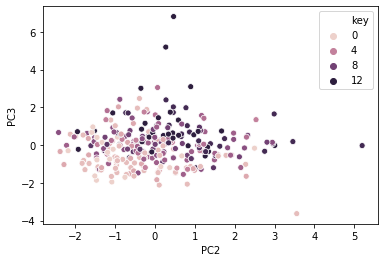

In [48]:
sns.scatterplot("PC2", "PC3", hue = "key", data = pca)

In [55]:
vects = fit.components_[:5]
vects

array([[-0.52144392,  0.50534727,  0.27005475, -0.25344616, -0.1474751 ,
        -0.05715534, -0.1768192 ,  0.13296114, -0.18940253,  0.42366917,
        -0.21500612],
       [-0.16289383, -0.29287692,  0.25655718, -0.37990627, -0.26932305,
         0.55334382,  0.41048901,  0.00726748,  0.35469683,  0.03914643,
        -0.05401602],
       [ 0.11432963, -0.09703811,  0.39683389,  0.00573738, -0.39293885,
        -0.42354224, -0.16574988,  0.50463167,  0.25788818, -0.35454306,
        -0.10899576],
       [ 0.17958304,  0.06921257,  0.22129854, -0.10586256,  0.29254647,
        -0.04802046,  0.50371976,  0.50537694, -0.3831039 ,  0.10499973,
         0.3846521 ],
       [-0.17090775,  0.08171834, -0.38796256, -0.39110288,  0.50778146,
        -0.08229327,  0.07554887,  0.30495968,  0.24217524, -0.28581667,
        -0.39619943]])

In [83]:
pca.sort_values(by='PC1')

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
139,Takkies,YoungstaCPT,8,2016,0.526,0.626,2,-3.780,1,0.1740,...,-3.511140,-0.683586,0.144005,1.058551,0.389792,-0.738233,-0.971580,-0.377869,-0.466673,0.024415
76,How To Rap About Africa,Black Vulcanite,10,2016,0.535,0.669,1,-8.771,1,0.5040,...,-3.336835,2.274795,-1.017323,0.861830,1.567709,-1.066880,-1.484954,-0.232217,-0.340918,-0.475008
271,March Madness,Future,2,2015,0.406,0.661,8,-5.142,1,0.3110,...,-3.073536,0.005194,0.040569,1.363190,-1.424670,1.045595,0.137918,-0.244952,1.338974,0.524802
83,Mural,Lupe Fiasco,10,2015,0.431,0.898,1,-4.233,0,0.1660,...,-3.044594,-0.206073,1.886676,-2.201016,0.169709,-0.362409,-0.528260,0.661825,-0.371704,0.582967
213,I Like That,Janelle Monae,4,2018,0.482,0.453,0,-8.864,1,0.0590,...,-3.034174,-1.583002,0.676966,0.078284,0.865817,1.511952,-0.615339,-0.520816,-0.272562,1.098662
43,Blood On The Leaves,Kanye West,14,2013,0.454,0.690,2,-4.108,0,0.1570,...,-3.023104,-0.171899,0.417635,0.987254,-1.658101,0.528240,-0.324717,0.596021,-1.571653,0.400462
121,God’s Eye,Stogie T,8,2018,0.489,0.650,1,-8.093,1,0.3320,...,-3.005820,-0.024464,-0.180949,-0.307682,0.391487,1.173735,0.116832,0.240624,0.670417,0.294206
198,Bastard,Tyler The Creator,4,2009,0.531,0.549,7,-9.949,1,0.3240,...,-2.902520,2.944410,0.148695,1.416781,0.977986,-0.468024,1.277493,-1.388204,-0.858974,-0.669292
175,Paper Planes,M.I.A.,6,2008,0.447,0.848,2,-6.175,1,0.2220,...,-2.895445,0.206255,0.295476,-0.676720,0.138189,1.149687,2.501618,0.418423,0.233409,0.160445
42,All Of The Lights,Kanye West ft. Rihanna & Kid Cudi,16,2010,0.541,0.803,1,-3.284,1,0.0738,...,-2.778907,-1.988834,0.457985,-0.009081,0.085349,0.496902,0.163938,0.111591,-0.023848,0.266795


In [ ]:
one = pd.Series(vects[0], index=df_continuous.columns)
one.sort_values(ascending=False)

* [High on PC1 Positive, Takkies by YounstaCPT](https://www.youtube.com/watch?v=418qWib8Frw)
* [High on PC1 Negative, Push it by Salt n Pepa](https://www.youtube.com/watch?v=vCadcBR95oU)

In [74]:
pca.sort_values(by='PC2')

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
206,Goosebumps,Travis Scott ft. Kendrick Lamar,4,2016,0.841,0.728,7,-3.370,1,0.0484,...,-1.007245,-2.417267,0.670083,0.657234,-0.610203,-0.599168,0.141175,-1.069084,0.190776,-0.624836
165,Learned from Texas,BIG K.R.I.T,6,2019,0.782,0.751,2,-4.995,1,0.1200,...,-1.222460,-2.378950,-0.339955,0.535835,-0.320010,-0.142720,-0.306868,-0.209153,-0.161189,0.045862
70,Bling Bling,B.G.,10,1999,0.868,0.964,2,-3.720,1,0.1110,...,0.981437,-2.281585,-1.029906,-0.094774,-0.081620,-1.014191,0.504862,0.499356,-0.293721,0.318264
173,Old Town Road (Remix),Lil Nas X ft. Billy Ray Cyrus,6,2019,0.878,0.619,6,-5.560,1,0.1020,...,-0.487658,-2.216823,-0.012276,0.897294,-0.719555,-0.263202,0.132993,-0.905513,0.037630,-0.349702
221,La La La,Lil Wayne,4,2007,0.698,0.660,0,-7.883,1,0.0520,...,-1.155357,-2.178257,-0.297215,0.521070,0.241462,1.597957,0.222051,-0.152118,-0.658480,0.337740
124,Humble,Kendrick Lamar,8,2017,0.908,0.621,1,-6.638,0,0.1020,...,-0.708335,-2.123036,0.576384,-0.041307,-0.956627,1.023760,-0.924958,-0.052032,-1.417196,-1.142101
174,OVERSEAS,Bohan Phoenix,6,2018,0.710,0.705,6,-6.554,1,0.0586,...,-1.068053,-2.024794,0.432452,0.660822,-0.497611,0.214071,0.032297,-0.934893,0.198010,0.618424
42,All Of The Lights,Kanye West ft. Rihanna & Kid Cudi,16,2010,0.541,0.803,1,-3.284,1,0.0738,...,-2.778907,-1.988834,0.457985,-0.009081,0.085349,0.496902,0.163938,0.111591,-0.023848,0.266795
68,All Of The Lights,Kanye West ft. Rihanna & Kid Cudi,10,2010,0.541,0.803,1,-3.284,1,0.0738,...,-2.778907,-1.988834,0.457985,-0.009081,0.085349,0.496902,0.163938,0.111591,-0.023848,0.266795
103,Real,Lupe Fiasco,8,2006,0.722,0.873,11,-4.343,1,0.0392,...,-0.051747,-1.943815,0.710899,0.816075,-1.284164,-0.037233,0.773108,-1.058102,0.873964,0.516045


In [73]:
two = pd.Series(vects[1], index=df_continuous.columns)
two.sort_values(ascending=True)

loudness           -0.379906
danceability       -0.292877
mode               -0.269323
year               -0.162894
tempo              -0.054016
instrumentalness    0.007267
valence             0.039146
key                 0.256557
liveness            0.354697
acousticness        0.410489
speechiness         0.553344
dtype: float64

* [High Positive PC2, Goosebumps by Travvis Scott | Kendrick Lamar](https://www.youtube.com/watch?v=3NQXAYMNt_c)
* [High Negative PC2, Mortal Man by Kendrick Lamar](https://www.youtube.com/watch?v=hWPcclD3MVI)

In [81]:
pca.sort_values(by='PC3')

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
186,The Story Of OJ,JAY-Z,6,2017,0.708,0.369,1,-12.799,1,0.7030,...,-1.498203,3.555916,-3.630974,3.135280,0.468322,-0.926957,-1.321166,0.080206,-1.252627,-0.483850
88,Players,Slum Village,10,1997,0.805,0.473,1,-5.924,1,0.4840,...,0.317880,0.106978,-2.115336,-0.148367,0.499179,-0.702419,-0.600483,1.084708,0.598132,-0.555509
6,93 ’Til Infinity,Souls of Mischief,50,1993,0.590,0.672,1,-11.792,1,0.4120,...,-0.511677,0.809973,-2.068135,1.081424,-0.158842,3.008418,1.061904,0.783807,0.073883,0.170528
99,Wot Do U Call It?,Wiley,10,2004,0.929,0.836,0,-6.833,1,0.2780,...,0.363043,-1.081665,-1.951577,0.876794,0.082393,-0.139447,0.255864,0.430856,-0.809891,-0.784728
92,That’s Not Me,Skepta ft. Jme,10,2014,0.827,0.854,0,-3.430,1,0.2380,...,-0.848862,-1.467316,-1.859412,1.347369,-0.696124,-1.112799,0.297822,0.645114,-0.967465,-0.308663
157,Get Money,Junior M.A.F.I.A. ft. The Notorious B.I.G.,6,1995,0.711,0.871,2,-4.320,1,0.2940,...,0.282724,0.047372,-1.835919,0.455616,0.174514,-1.797680,0.544335,0.888571,-0.519828,0.560210
201,Can I Kick It,A Tribe Called Quest,4,1990,0.848,0.666,0,-6.547,1,0.2740,...,1.026506,-0.752979,-1.705298,-0.196345,0.885829,-0.450258,0.127509,0.782978,-0.381409,-0.174760
224,My Name Is,Eminem,4,1999,0.869,0.680,1,-6.233,1,0.3180,...,1.002157,-1.091159,-1.658405,-0.391281,0.489247,-0.690436,-0.307318,0.760451,0.254506,-0.034991
158,Get The Bozack,EPMD,6,1989,0.625,0.514,2,-12.918,1,0.4010,...,0.117975,2.288518,-1.650827,0.473078,1.772109,0.236281,0.152124,0.009577,-0.657853,0.521877
252,Déjà Vu (Uptown Baby),Lord Tariq & Peter Gunz,2,1998,0.861,0.622,1,-7.493,1,0.3790,...,0.642310,-0.525675,-1.642878,-0.274715,0.754316,-0.139587,-0.510675,0.599478,0.349369,-0.520948


In [76]:
three = pd.Series(vects[2], index=df_continuous.columns)
three.sort_values(ascending=False)

instrumentalness    0.504632
key                 0.396834
liveness            0.257888
year                0.114330
loudness            0.005737
danceability       -0.097038
tempo              -0.108996
acousticness       -0.165750
valence            -0.354543
mode               -0.392939
speechiness        -0.423542
dtype: float64

* [High Positive on PC3, The Story of OJ by Jay Z](https://www.youtube.com/watch?v=RM7lw0Ovzq0)
* [High Negative on PC3, Aint Nuttin but a G Thang by Snoop Dog](https://www.youtube.com/watch?v=MDOdVdS8Z1A)

In [82]:
pca.sort_values(by='PC4')

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC10,PC6,PC7,PC8,PC9,PC10
35,Sucker MCs,Run DMC,18,1984,0.444,0.944,4,-7.001,0,0.3160,...,-1.077260,2.534895,1.347697,-2.781515,0.750682,0.292625,1.942476,0.975220,-0.208700,-0.143356
101,Can’t Tell Me Nothing,Kanye West,8,2007,0.596,0.620,5,-6.133,0,0.0390,...,-1.917292,0.065961,3.050967,-2.574001,0.852710,-0.325942,0.618978,-0.628337,-0.672389,-0.369254
136,Slippin',DMX,8,1998,0.475,0.576,10,-8.061,0,0.3970,...,-0.722380,2.989972,1.650259,-2.394905,-0.126208,-0.403369,1.528984,0.174400,0.846288,0.204243
83,Mural,Lupe Fiasco,10,2015,0.431,0.898,1,-4.233,0,0.1660,...,-3.044594,-0.206073,1.886676,-2.201016,0.169709,-0.362409,-0.528260,0.661825,-0.371704,0.582967
22,Rosa Parks,OutKast,26,1998,0.792,0.701,6,-7.198,0,0.2830,...,-0.492376,1.169500,1.572566,-1.891017,0.473502,-0.029966,0.601098,-0.258032,-0.333190,-1.838232
28,Protect Ya Neck,Wu-Tang Clan,22,1992,0.817,0.552,8,-10.800,0,0.3860,...,1.552132,2.326904,0.519683,-1.861868,0.087551,0.085078,1.632307,0.061000,-0.111065,-0.852686
57,Stan,Eminem ft. Dido,12,2000,0.780,0.768,6,-4.325,0,0.2380,...,0.127199,0.090037,1.142466,-1.829223,-0.306680,-1.036899,0.201179,0.308238,-0.125836,-0.789481
78,I Really Mean It,The Diplomats,10,2003,0.576,0.726,0,-4.409,1,0.2000,...,-1.011024,-0.318771,-0.311102,-1.786830,0.938154,-1.269997,1.936699,1.028486,-0.043595,0.930820
18,U.N.I.T.Y.,Queen Latifah,30,1993,0.659,0.738,4,-4.077,0,0.3620,...,0.007199,0.397482,0.222087,-1.734987,-0.600546,-0.270378,-0.251886,1.310490,0.352013,-0.335774
46,Party Up (Up In Here),DMX,14,1999,0.736,0.834,1,-3.052,0,0.0969,...,-1.037900,-1.108247,1.329391,-1.707139,0.124683,-0.303314,-0.097598,0.563345,-1.093263,-0.945251


In [79]:
four = pd.Series(vects[3], index=df_continuous.columns)
four.sort_values(ascending=False)

instrumentalness    0.505377
acousticness        0.503720
tempo               0.384652
mode                0.292546
key                 0.221299
year                0.179583
valence             0.105000
danceability        0.069213
speechiness        -0.048020
loudness           -0.105863
liveness           -0.383104
dtype: float64

* [High Positive on PC4, Sucker MCs by Run DMC](https://www.youtube.com/watch?v=iOKMWSR2Aio)
* [High Negative on PC4, Nuthin  by Run DMC](https://www.youtube.com/watch?v=MDOdVdS8Z1A)